In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_parquet('train_data.parquet')
dataset.head(1)

,alphabets,landmark_0,landmark_1,landmark_2,landmark_3,landmark_4,landmark_5,landmark_6,landmark_7,landmark_8,...,landmark_7990,landmark_7991,landmark_7992,landmark_7993,landmark_7994,landmark_7995,landmark_7996,landmark_7997,landmark_7998,landmark_7999
0,a,"[0.4838511645793915, 0.6284142732620239, 0.369...","[0.48559656739234924, 0.6370050311088562, 0.37...","[0.4946433901786804, 0.6508243083953857, 0.376...","[0.48447081446647644, 0.6698311567306519, 0.37...","[0.49145880341529846, 0.6666201949119568, 0.36...","[0.4821345806121826, 0.6677781343460083, 0.358...","[0.48449715971946716, 0.6721535325050354, 0.35...","[0.4841638207435608, 0.6722722053527832, 0.357...","[0.4823983311653137, 0.671943187713623, 0.3552...",...,"[0.489443838596344, 0.6730363368988037, 0.3607...","[0.4863154888153076, 0.6711098551750183, 0.361...","[0.4835115075111389, 0.6675708889961243, 0.361...","[0.48151394724845886, 0.667807936668396, 0.359...","[0.486027330160141, 0.6649206280708313, 0.3578...","[0.48650282621383667, 0.6637972593307495, 0.35...","[0.47774815559387207, 0.6650660037994385, 0.35...","[0.47892794013023376, 0.6657238006591797, 0.35...","[0.4793429970741272, 0.6666581630706787, 0.356...","[0.48166096210479736, 0.6673048734664917, 0.35..."


In [3]:
dataset = dataset.set_index('alphabets')

In [4]:
dataset['landmarks'] = dataset.apply(lambda row: row.tolist(), axis=1)

In [5]:
# Now, drop the original landmark columns as they are no longer needed
dataset = dataset[['landmarks']]

In [6]:
dataset.head(1)

,landmarks
alphabets,
a,"[[0.4838511645793915, 0.6284142732620239, 0.36..."


In [7]:
dataset_dict = dataset['landmarks'].to_dict()

In [8]:
# Initialize lists for features and labels
traindata_features = []
traindata_labels = []
validationdata_features = []
validationdata_labels = []
testdata_features = []
testdata_labels = []

In [9]:
# Label mapping from alphabet to integers
label_map = {chr(i + ord('a')): i for i in range(26)}

# Desired number of samples for each set
n_train = 5800
n_validation = 1100
n_test = 1100

In [10]:
for label, features_list in dataset_dict.items():
    for feat in features_list[:n_train]:
        traindata_features.append(feat)
        traindata_labels.append(label)
traindata_features = np.array(traindata_features)
traindata_labels = np.array(traindata_labels)

In [11]:
for label, features_list in dataset_dict.items():
    for feat in features_list[n_train:n_train+n_validation]:
        validationdata_features.append(feat)
        validationdata_labels.append(label)
validationdata_features = np.array(validationdata_features)
validationdata_labels = np.array(validationdata_labels)

In [12]:
for label, features_list in dataset_dict.items():
    for feat in features_list[n_train+n_validation:n_train+n_validation+n_test]:
        testdata_features.append(feat)
        testdata_labels.append(label)
testdata_features = np.array(testdata_features)
testata_labels = np.array(testdata_labels)

In [13]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Function to convert character labels to one-hot encoded labels
def prepare_labels(labels):
    # Convert character labels to ASCII values
    ascii_labels = np.array([ord(label) for label in labels])

    # Normalize ASCII values to start from 0 ('a' -> 0, 'b' -> 1, ..., 'z' -> 25)
    normalized_labels = ascii_labels - ord('a')

    # Convert normalized labels to one-hot encoding
    one_hot_labels = to_categorical(normalized_labels, num_classes=26)  # 26 for 'a' to 'z'

    return one_hot_labels

# Prepare train, validation, and test labels
traindata_one_hot_labels = prepare_labels(traindata_labels)
validationdata_one_hot_labels = prepare_labels(validationdata_labels)
testdata_one_hot_labels = prepare_labels(testdata_labels)

In [14]:
traindata_features.shape

(150800, 42)

In [15]:
# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(42,)),  # Input layer: Specify input_shape to match the number of features
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(26, activation='softmax')  # Output layer: 26 classes for the alphabet
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\omkar\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
history = model.fit(
    traindata_features, traindata_one_hot_labels,
    validation_data=(validationdata_features,validationdata_one_hot_labels),
    epochs=10,
    batch_size=32
)

Epoch 1/10
4713/4713 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.6494 - loss: 1.1221 - val_accuracy: 0.9615 - val_loss: 0.1151
Epoch 2/10
4713/4713 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9624 - loss: 0.1137 - val_accuracy: 0.9462 - val_loss: 0.1322
Epoch 3/10
4713/4713 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9763 - loss: 0.0709 - val_accuracy: 0.9602 - val_loss: 0.1075
Epoch 4/10
4713/4713 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9801 - loss: 0.0578 - val_accuracy: 0.9558 - val_loss: 0.1183
Epoch 5/10
4713/4713 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9830 - loss: 0.0496 - val_accuracy: 0.9599 - val_loss: 0.1104
Epoch 6/10
4713/4713 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9847 - loss: 0.0452 - val_accuracy: 0.9562 - val_loss: 0.1328
Epoch 7/10
4713/4713 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9860 - loss: 0.0422 - val_accuracy: 0.9733 - val_loss: 0.1152
Epoch 8/10
4713/4713 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9864 - loss: 0

In [17]:
# Assuming you have separated your test data
# testdata_features, testdata_labels
test_loss, test_accuracy = model.evaluate(testdata_features, testdata_one_hot_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

894/894 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9876 - loss: 0.0487
Test Loss: 0.09263090044260025
Test Accuracy: 0.976608395576477


In [18]:
predict1 = np.array([dataset_dict['a'][7000]])
predict1.shape

(1, 42)

In [19]:
output = model.predict(predict1)
predicted_class_index = np.argmax(output)
predicted_class_probability = output[0][predicted_class_index]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


In [20]:
predicted_letter = chr(predicted_class_index + ord('a'))
print("Predicted Letter:", predicted_letter)

Predicted Letter: a


In [126]:
label_map1 = [chr(i + ord('a')) for i in range(26)]
for lab in label_map1:
    lablist = dataset_dict[lab]
    lablist = lablist[7990:8000]
    op = []
    for feat in lablist:
        predict1 = np.array([feat])
        output = model.predict(predict1)
        predicted_class_index = np.argmax(output)
        predicted_class_probability = output[0][predicted_class_index]
        predicted_letter = chr(predicted_class_index + ord('a'))
        op.append(predicted_letter)
    print(f"Actual letter: {lab} , predicted letter: {op}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Actual letter: a , predicted letter: ['a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Actual letter: b , predicted letter: ['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

894/894 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


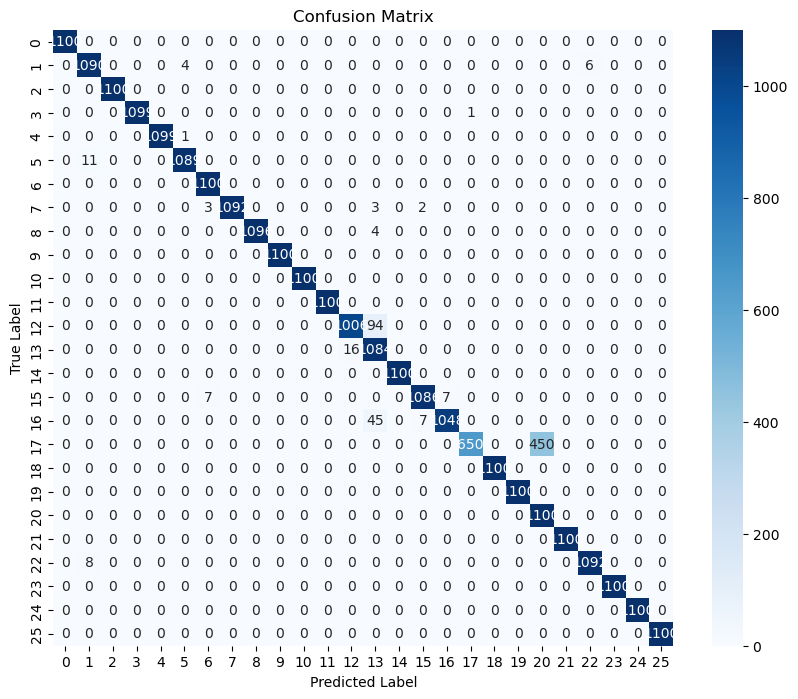

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the labels on the test dataset
predictions = model.predict(testdata_features)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(testdata_one_hot_labels, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
# Save the figure
plt.savefig('confusion_matrix.png')  # Save as high-res PNG file
plt.show()

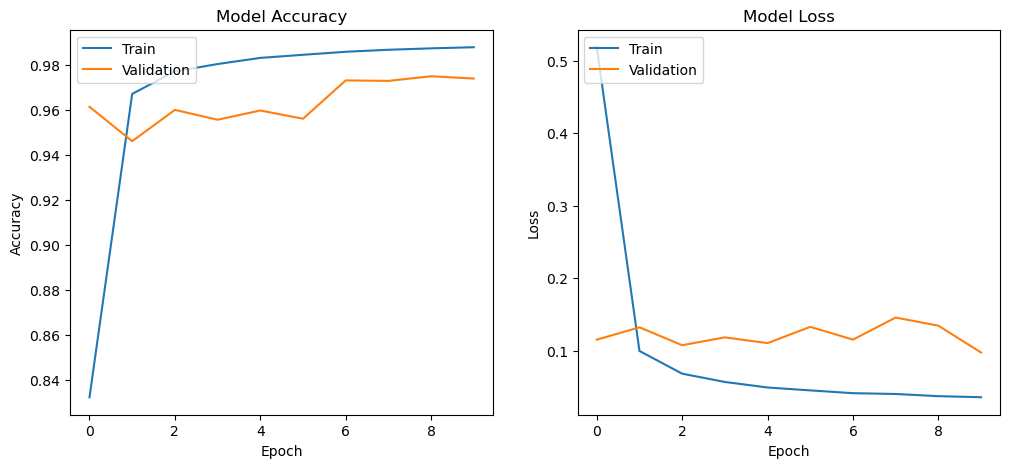

In [23]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
# Save the figure
plt.savefig('modelaccuracyloss.png')  # Save as high-res PNG file
plt.show()

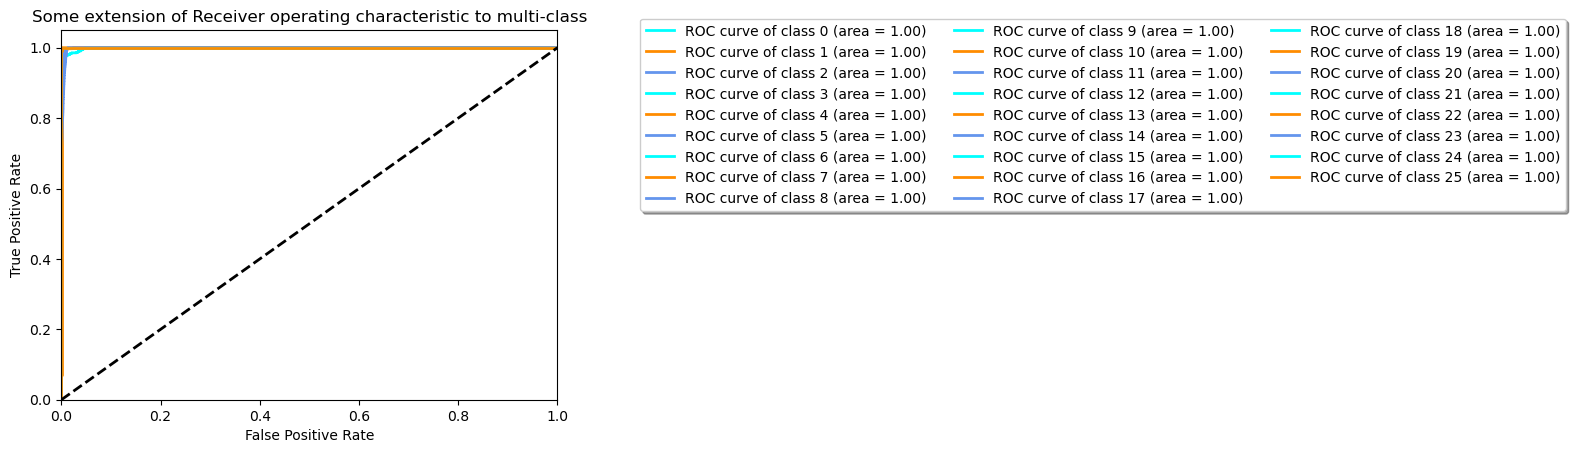

In [24]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the labels for ROC curve
y_bin = label_binarize(true_classes, classes=np.arange(26))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(26):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(26), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc='upper center', bbox_to_anchor=(2.1, 1.05),
          ncol=3, fancybox=True, shadow=True)
# Save the figure
plt.savefig('roc_curve.png', format='png', dpi=300)  # Save as high-res PNG file
plt.show()

In [27]:
model_json = model.to_json()
with open("pose_estimation.json", "w") as json_file:
    json_file.write(model_json)
print('Model Saved')
model.save_weights('pose_estimation.weights.h5')
print('Weights saved')

Model Saved
Weights saved
